In [58]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc90/BHOSS_CODE"
data = "Rh5_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A0_149.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9524.561272 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 1.07399e-17 0.00142066
Total flux = 1.901394 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9494.771937 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000727662
Total flux = 2.030727 Jy at 230 GHz
139:50:09.213 - Start Program


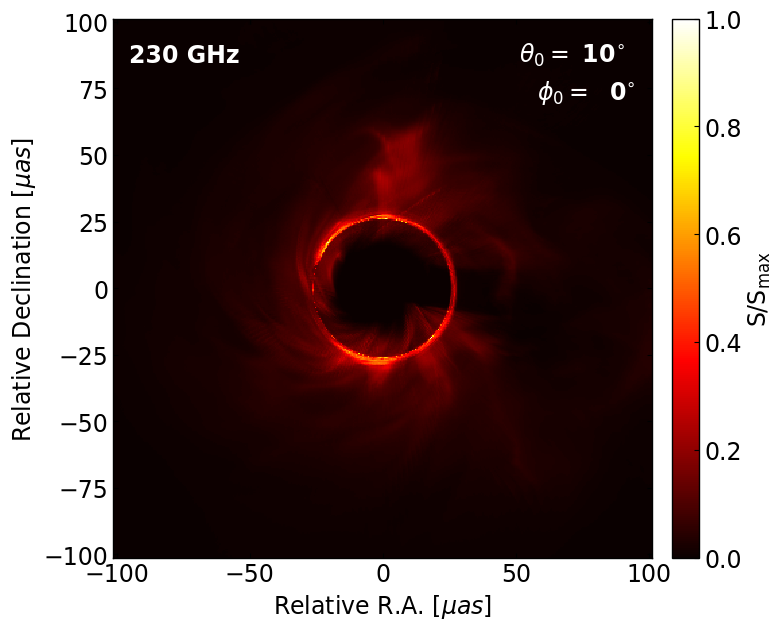

In [17]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [26]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [27]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc10/BHOSS_CODE
97, flux: 2.396445 at 9004.234232
98, flux: 2.329926 at 9014.746059
99, flux: 2.290846 at 9023.505435
100, flux: 2.229024 at 9034.016452
101, flux: 2.195296 at 9044.529609
102, flux: 2.176368 at 9053.290056
103, flux: 2.123863 at 9063.802536
104, flux: 2.102309 at 9074.314016
105, flux: 2.132624 at 9084.823874
106, flux: 2.160068 at 9093.581252
107, flux: 2.096588 at 9104.090482
108, flux: 2.078284 at 9114.601360
109, flux: 2.105944 at 9123.359993
110, flux: 2.133310 at 9133.870253
111, flux: 2.124793 at 9144.379583
112, flux: 2.117583 at 9154.889223
113, flux: 2.120534 at 9163.648327
114, flux: 2.113015 at 9174.157990
115, flux: 2.101477 at 9184.666192
116, flux: 2.118835 at 9193.424046
117, flux: 2.142670 at 9203.933544
118, flux: 2.175687 at 9214.444133
119, flux: 2.223682 at 9224.955775
120, flux: 2.254394 at 9233.717169
121, flux: 2.266141 at 9244.228854
122, flux: 2.272018 at 9254.740756
123, flux:

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.999949 Jy, the density scale = 1.250000e-18


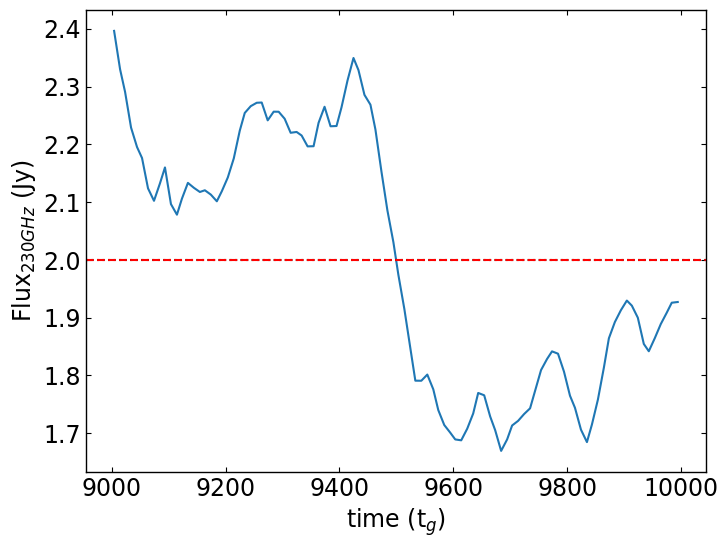

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.396445 Jy at 9004.234232
98:: 2.329926 Jy at 9014.746059
99:: 2.290846 Jy at 9023.505435
100:: 2.229024 Jy at 9034.016452
101:: 2.195296 Jy at 9044.529609
102:: 2.176368 Jy at 9053.290056
103:: 2.123863 Jy at 9063.802536
104:: 2.102309 Jy at 9074.314016
105:: 2.132624 Jy at 9084.823874
106:: 2.160068 Jy at 9093.581252
107:: 2.096588 Jy at 9104.090482
108:: 2.078284 Jy at 9114.601360
109:: 2.105944 Jy at 9123.359993
110:: 2.133310 Jy at 9133.870253
111:: 2.124793 Jy at 9144.379583
112:: 2.117583 Jy at 9154.889223
113:: 2.120534 Jy at 9163.648327
114:: 2.113015 Jy at 9174.157990
115:: 2.101477 Jy at 9184.666192
116:: 2.118835 Jy at 9193.424046
117:: 2.142670 Jy at 9203.933544
118:: 2.175687 Jy at 9214.444133
119:: 2.223682 Jy at 9224.955775
120:: 2.254394 Jy at 9233.717169
121:: 2.266141 Jy at 9244.228854
122:: 2.272018 Jy at 9254.740756
123:: 2.272439 Jy at 9263.502558
124:: 2.241582 Jy at 9274.015079
125:: 2.256603 Jy at 9284.527261
126:: 2.256467 Jy at 9293.287130
127:: 2.24437

In [32]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc30/BHOSS_CODE
97, flux: 2.345787 at 9004.234232
98, flux: 2.294652 at 9014.746059
99, flux: 2.256248 at 9023.505435
100, flux: 2.200319 at 9034.016452
101, flux: 2.168347 at 9044.529609
102, flux: 2.150211 at 9053.290056
103, flux: 2.094623 at 9063.802536
104, flux: 2.058362 at 9074.314016
105, flux: 2.076335 at 9084.823874
106, flux: 2.105498 at 9093.581252
107, flux: 2.065275 at 9104.090482
108, flux: 2.033962 at 9114.601360
109, flux: 2.050036 at 9123.359993
110, flux: 2.059222 at 9133.870253
111, flux: 2.042114 at 9144.379583
112, flux: 2.033392 at 9154.889223
113, flux: 2.035025 at 9163.648327
114, flux: 2.023442 at 9174.157990
115, flux: 2.004704 at 9184.666192
116, flux: 2.019672 at 9193.424046
117, flux: 2.038387 at 9203.933544
118, flux: 2.068096 at 9214.444133
119, flux: 2.115116 at 9224.955775
120, flux: 2.149522 at 9233.717169
121, flux: 2.172438 at 9244.228854
122, flux: 2.191456 at 9254.740756
123, flux:

In [33]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [34]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.943338 Jy, the density scale = 1.150000e-18


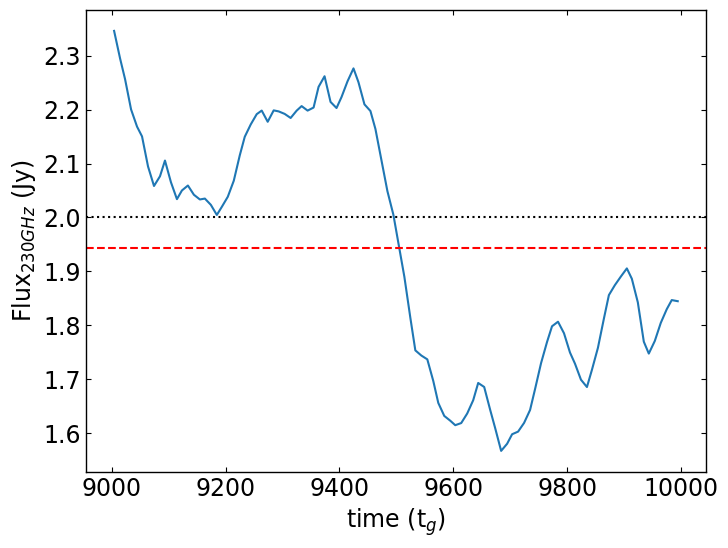

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [36]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.345787 Jy at 9004.234232
98:: 2.294652 Jy at 9014.746059
99:: 2.256248 Jy at 9023.505435
100:: 2.200319 Jy at 9034.016452
101:: 2.168347 Jy at 9044.529609
102:: 2.150211 Jy at 9053.290056
103:: 2.094623 Jy at 9063.802536
104:: 2.058362 Jy at 9074.314016
105:: 2.076335 Jy at 9084.823874
106:: 2.105498 Jy at 9093.581252
107:: 2.065275 Jy at 9104.090482
108:: 2.033962 Jy at 9114.601360
109:: 2.050036 Jy at 9123.359993
110:: 2.059222 Jy at 9133.870253
111:: 2.042114 Jy at 9144.379583
112:: 2.033392 Jy at 9154.889223
113:: 2.035025 Jy at 9163.648327
114:: 2.023442 Jy at 9174.157990
115:: 2.004704 Jy at 9184.666192
116:: 2.019672 Jy at 9193.424046
117:: 2.038387 Jy at 9203.933544
118:: 2.068096 Jy at 9214.444133
119:: 2.115116 Jy at 9224.955775
120:: 2.149522 Jy at 9233.717169
121:: 2.172438 Jy at 9244.228854
122:: 2.191456 Jy at 9254.740756
123:: 2.198119 Jy at 9263.502558
124:: 2.177345 Jy at 9274.015079
125:: 2.198471 Jy at 9284.527261
126:: 2.196582 Jy at 9293.287130
127:: 2.19195

In [59]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc50/BHOSS_CODE
97, flux: 2.547148 at 9004.234232
98, flux: 2.495636 at 9014.746059
99, flux: 2.453995 at 9023.505435
100, flux: 2.396280 at 9034.016452
101, flux: 2.357965 at 9044.529609
102, flux: 2.329803 at 9053.290056
103, flux: 2.250778 at 9063.802536
104, flux: 2.193800 at 9074.314016
105, flux: 2.194759 at 9084.823874
106, flux: 2.221227 at 9093.581252
107, flux: 2.177671 at 9104.090482
108, flux: 2.116350 at 9114.601360
109, flux: 2.116284 at 9123.359993
110, flux: 2.112592 at 9133.870253
111, flux: 2.098247 at 9144.379583
112, flux: 2.097251 at 9154.889223
113, flux: 2.101473 at 9163.648327
114, flux: 2.094803 at 9174.157990
115, flux: 2.062780 at 9184.666192
116, flux: 2.074315 at 9193.424046
117, flux: 2.091125 at 9203.933544
118, flux: 2.124371 at 9214.444133
119, flux: 2.168199 at 9224.955775
120, flux: 2.206307 at 9233.717169
121, flux: 2.231249 at 9244.228854
122, flux: 2.252516 at 9254.740756
123, flux:

In [60]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [61]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.037770 Jy, the density scale = 1.080000e-18


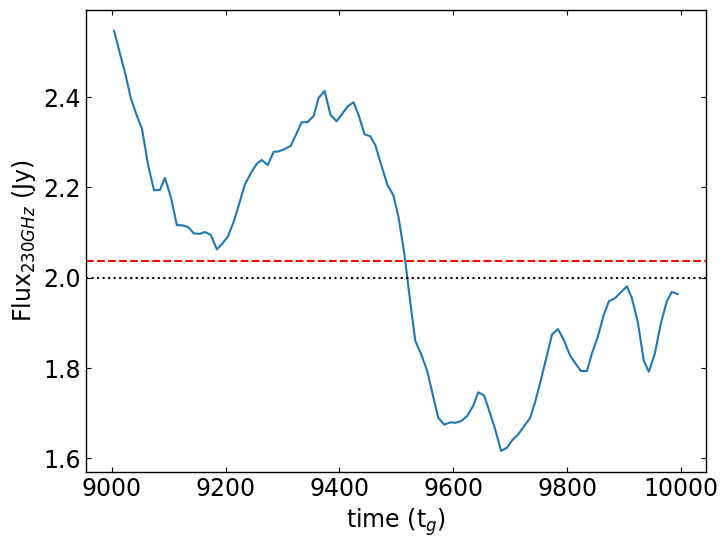

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [63]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.547148 Jy at 9004.234232
98:: 2.495636 Jy at 9014.746059
99:: 2.453995 Jy at 9023.505435
100:: 2.396280 Jy at 9034.016452
101:: 2.357965 Jy at 9044.529609
102:: 2.329803 Jy at 9053.290056
103:: 2.250778 Jy at 9063.802536
104:: 2.193800 Jy at 9074.314016
105:: 2.194759 Jy at 9084.823874
106:: 2.221227 Jy at 9093.581252
107:: 2.177671 Jy at 9104.090482
108:: 2.116350 Jy at 9114.601360
109:: 2.116284 Jy at 9123.359993
110:: 2.112592 Jy at 9133.870253
111:: 2.098247 Jy at 9144.379583
112:: 2.097251 Jy at 9154.889223
113:: 2.101473 Jy at 9163.648327
114:: 2.094803 Jy at 9174.157990
115:: 2.062780 Jy at 9184.666192
116:: 2.074315 Jy at 9193.424046
117:: 2.091125 Jy at 9203.933544
118:: 2.124371 Jy at 9214.444133
119:: 2.168199 Jy at 9224.955775
120:: 2.206307 Jy at 9233.717169
121:: 2.231249 Jy at 9244.228854
122:: 2.252516 Jy at 9254.740756
123:: 2.261120 Jy at 9263.502558
124:: 2.249744 Jy at 9274.015079
125:: 2.279178 Jy at 9284.527261
126:: 2.279979 Jy at 9293.287130
127:: 2.28511

In [64]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc70/BHOSS_CODE
97, flux: 2.634492 at 9004.234232
98, flux: 2.566031 at 9014.746059
99, flux: 2.508129 at 9023.505435
100, flux: 2.455352 at 9034.016452
101, flux: 2.398557 at 9044.529609
102, flux: 2.327812 at 9053.290056
103, flux: 2.207987 at 9063.802536
104, flux: 2.163927 at 9074.314016
105, flux: 2.151344 at 9084.823874
106, flux: 2.161455 at 9093.581252
107, flux: 2.103459 at 9104.090482
108, flux: 2.047741 at 9114.601360
109, flux: 2.049028 at 9123.359993
110, flux: 2.041550 at 9133.870253
111, flux: 2.058550 at 9144.379583
112, flux: 2.084474 at 9154.889223
113, flux: 2.096601 at 9163.648327
114, flux: 2.017409 at 9174.157990
115, flux: 1.947050 at 9184.666192
116, flux: 2.008585 at 9193.424046
117, flux: 2.060423 at 9203.933544
118, flux: 2.107573 at 9214.444133
119, flux: 2.163426 at 9224.955775
120, flux: 2.196748 at 9233.717169
121, flux: 2.204552 at 9244.228854
122, flux: 2.219380 at 9254.740756
123, flux:

In [65]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [66]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.989109 Jy, the density scale = 9.750000e-19


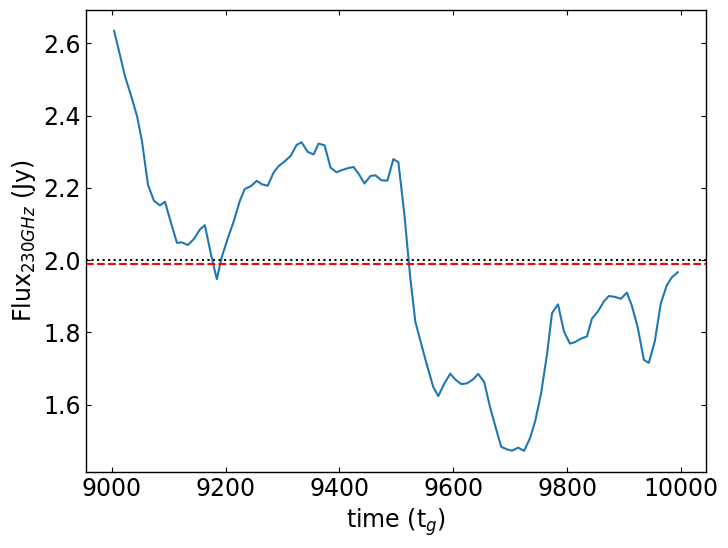

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [68]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.634492 Jy at 9004.234232
98:: 2.566031 Jy at 9014.746059
99:: 2.508129 Jy at 9023.505435
100:: 2.455352 Jy at 9034.016452
101:: 2.398557 Jy at 9044.529609
102:: 2.327812 Jy at 9053.290056
103:: 2.207987 Jy at 9063.802536
104:: 2.163927 Jy at 9074.314016
105:: 2.151344 Jy at 9084.823874
106:: 2.161455 Jy at 9093.581252
107:: 2.103459 Jy at 9104.090482
108:: 2.047741 Jy at 9114.601360
109:: 2.049028 Jy at 9123.359993
110:: 2.041550 Jy at 9133.870253
111:: 2.058550 Jy at 9144.379583
112:: 2.084474 Jy at 9154.889223
113:: 2.096601 Jy at 9163.648327
114:: 2.017409 Jy at 9174.157990
115:: 1.947050 Jy at 9184.666192
116:: 2.008585 Jy at 9193.424046
117:: 2.060423 Jy at 9203.933544
118:: 2.107573 Jy at 9214.444133
119:: 2.163426 Jy at 9224.955775
120:: 2.196748 Jy at 9233.717169
121:: 2.204552 Jy at 9244.228854
122:: 2.219380 Jy at 9254.740756
123:: 2.210105 Jy at 9263.502558
124:: 2.205632 Jy at 9274.015079
125:: 2.242787 Jy at 9284.527261
126:: 2.260173 Jy at 9293.287130
127:: 2.27336

In [69]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc90/BHOSS_CODE
97, flux: 2.524147 at 9004.234232
98, flux: 2.491759 at 9014.746059
99, flux: 2.435784 at 9023.505435
100, flux: 2.361782 at 9034.016452
101, flux: 2.291881 at 9044.529609
102, flux: 2.239339 at 9053.290056
103, flux: 2.137583 at 9063.802536
104, flux: 2.211047 at 9074.314016
105, flux: 2.078378 at 9084.823874
106, flux: 2.282923 at 9093.581252
107, flux: 2.201737 at 9104.090482
108, flux: 2.262260 at 9114.601360
109, flux: 2.210610 at 9123.359993
110, flux: 2.173508 at 9133.870253
111, flux: 2.254498 at 9144.379583
112, flux: 2.309202 at 9154.889223
113, flux: 2.347154 at 9163.648327
114, flux: 2.129097 at 9174.157990
115, flux: 2.030409 at 9184.666192
116, flux: 2.214848 at 9193.424046
117, flux: 2.301751 at 9203.933544
118, flux: 2.312607 at 9214.444133
119, flux: 2.347938 at 9224.955775
120, flux: 2.396005 at 9233.717169
121, flux: 2.414756 at 9244.228854
122, flux: 2.380647 at 9254.740756
123, flux:

In [70]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [71]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.968358 Jy, the density scale = 9.150000e-19


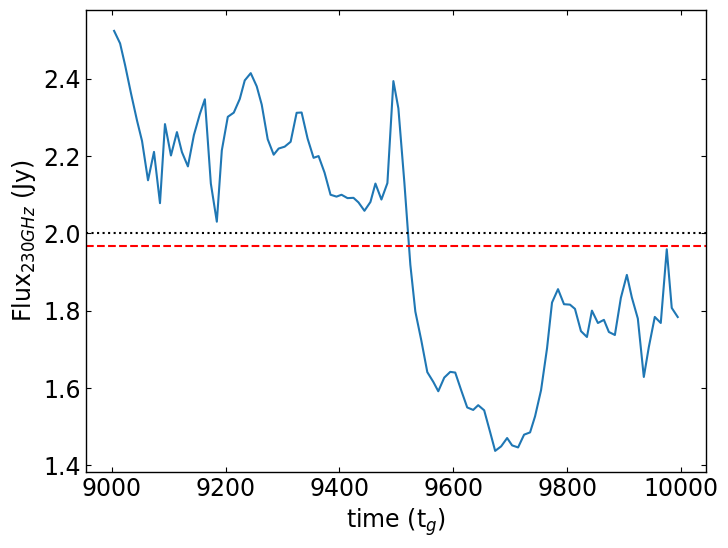

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [73]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.524147 Jy at 9004.234232
98:: 2.491759 Jy at 9014.746059
99:: 2.435784 Jy at 9023.505435
100:: 2.361782 Jy at 9034.016452
101:: 2.291881 Jy at 9044.529609
102:: 2.239339 Jy at 9053.290056
103:: 2.137583 Jy at 9063.802536
104:: 2.211047 Jy at 9074.314016
105:: 2.078378 Jy at 9084.823874
106:: 2.282923 Jy at 9093.581252
107:: 2.201737 Jy at 9104.090482
108:: 2.262260 Jy at 9114.601360
109:: 2.210610 Jy at 9123.359993
110:: 2.173508 Jy at 9133.870253
111:: 2.254498 Jy at 9144.379583
112:: 2.309202 Jy at 9154.889223
113:: 2.347154 Jy at 9163.648327
114:: 2.129097 Jy at 9174.157990
115:: 2.030409 Jy at 9184.666192
116:: 2.214848 Jy at 9193.424046
117:: 2.301751 Jy at 9203.933544
118:: 2.312607 Jy at 9214.444133
119:: 2.347938 Jy at 9224.955775
120:: 2.396005 Jy at 9233.717169
121:: 2.414756 Jy at 9244.228854
122:: 2.380647 Jy at 9254.740756
123:: 2.333436 Jy at 9263.502558
124:: 2.243788 Jy at 9274.015079
125:: 2.203780 Jy at 9284.527261
126:: 2.219715 Jy at 9293.287130
127:: 2.22451